## Iris Flower Dataset
**Problem to solve**:  Identify the different 3 classes of flowers from 4 given feature .

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import classification_report,confusion_matrix

Reading the CSV file

In [31]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HappyMonk/MultiLayerPerceptron-1621c5c58cde50a3d30dafc585f88161a9483f1c/MultiLayerPerceptron-1621c5c58cde50a3d30dafc585f88161a9483f1c/Copy of iris.csv")

In [32]:
df.shape

(150, 5)

Let's print the first few elements in the dataset

In [33]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### EDA & Preprocessing

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The dataset is very clean and has no null values present.

In [35]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Correlation of Data

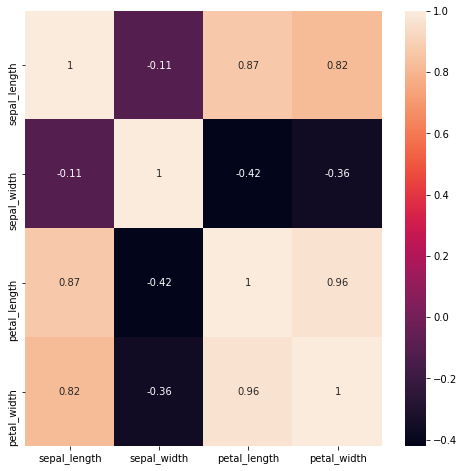

In [36]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

Let's have a look at species column.

In [37]:
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

Applying LabelEncoder on species

In [38]:
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])

In [39]:
df["species"].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

countplot of available species.

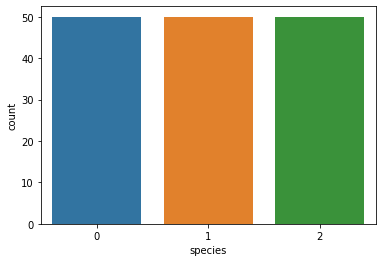

In [40]:
plt.figure()
sns.countplot(data = df, x='species')
plt.show()

The classes have  equal count. Hence, the dataset has good balance

**visualizing continuous variables**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


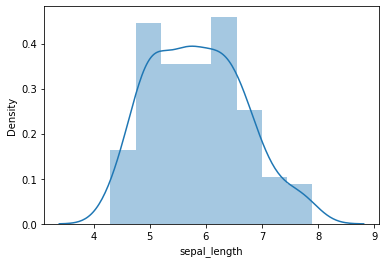

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.3117530585022963


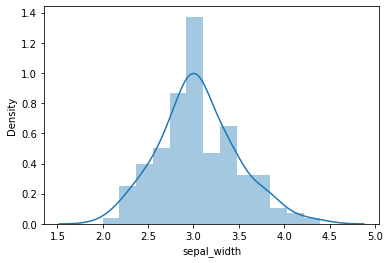

0.330702812773315


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


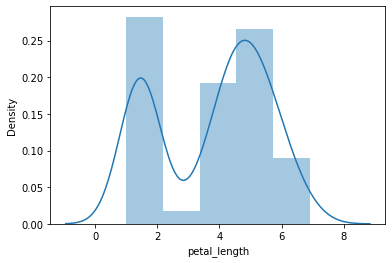

-0.2717119501716388


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


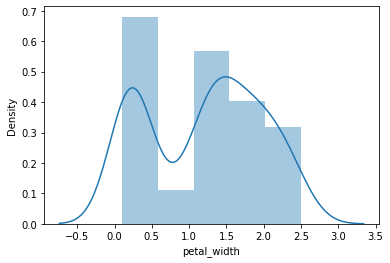

-0.10394366626751729


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


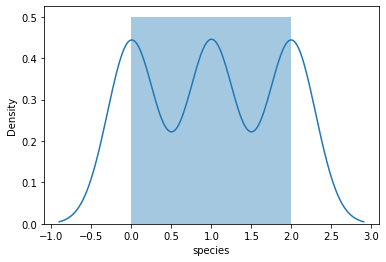

0.0


In [41]:
# Distribution of data using distplot and checking skewness
for col in df:
  plt.figure()
  sns.distplot(df[col])
  plt.show()
  print(skew(df[col]))

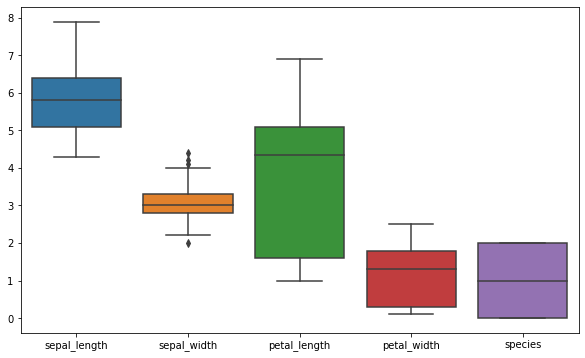

In [42]:
# Distribution of data using Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show()

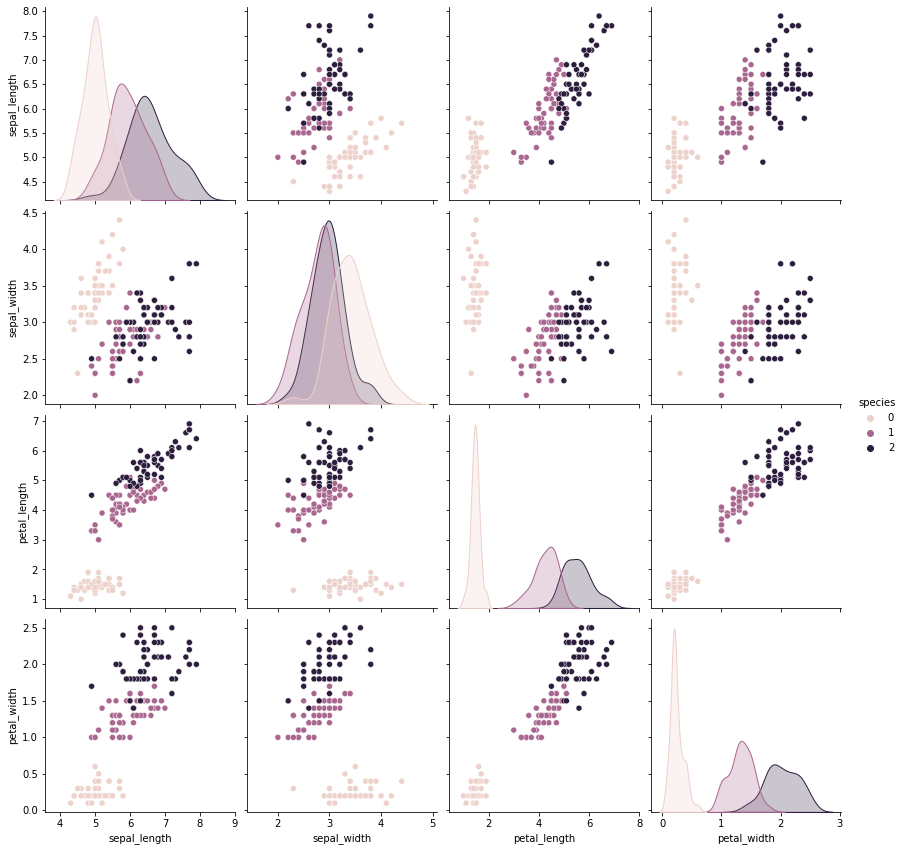

In [43]:
# Distribution of data using pairplot
sns.pairplot(data=df, hue='species', height=3)
plt.show()

There are clear separations shown, especially for pairs of features having 'variance'.

Here we use iloc for seprating labels and feature

In [44]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [45]:
# splitting data into training set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,stratify=y)

In [46]:
# Scaling data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## ANN

In [47]:
# initializing ann
model = Sequential()

In [48]:
# adding the first input layer and the first hidden layer
model.add(Dense(3,input_shape=(X.shape[1],),activation='softmax'))

In [49]:
## model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [51]:
model_history = model.fit(X_train,y_train,batch_size = 150, epochs = 300,validation_data=(X_train,y_train))

Epoch 1/300
1/1 [==============================] - 0s 313ms/step - loss: 1.3367 - accuracy: 0.3600 - val_loss: 1.3335 - val_accuracy: 0.3600
Epoch 2/300
1/1 [==============================] - 0s 17ms/step - loss: 1.3335 - accuracy: 0.3600 - val_loss: 1.3303 - val_accuracy: 0.3600
Epoch 3/300
1/1 [==============================] - 0s 18ms/step - loss: 1.3303 - accuracy: 0.3600 - val_loss: 1.3271 - val_accuracy: 0.3600
Epoch 4/300
1/1 [==============================] - 0s 20ms/step - loss: 1.3271 - accuracy: 0.3600 - val_loss: 1.3238 - val_accuracy: 0.3600
Epoch 5/300
1/1 [==============================] - 0s 17ms/step - loss: 1.3238 - accuracy: 0.3600 - val_loss: 1.3206 - val_accuracy: 0.3600
Epoch 6/300
1/1 [==============================] - 0s 19ms/step - loss: 1.3206 - accuracy: 0.3600 - val_loss: 1.3174 - val_accuracy: 0.3600
Epoch 7/300
1/1 [==============================] - 0s 19ms/step - loss: 1.3174 - accuracy: 0.3600 - val_loss: 1.3143 - val_accuracy: 0.3600
Epoch 8/300
1/1 [==

### Training vs Test loss

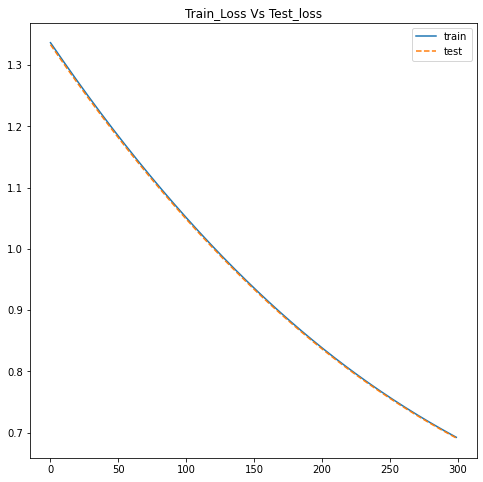

In [52]:
fig , ax = plt.subplots(figsize=(8,8))
plt.title('Train_Loss Vs Test_loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'],label='test',linestyle='--')
plt.legend()
plt.show()

## Train_Accuracy vs. Test_Accuracy

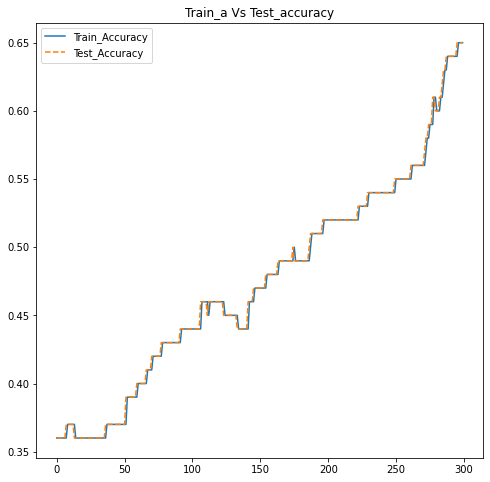

In [53]:
fig , ax = plt.subplots(figsize=(8,8))
plt.title('Train_a Vs Test_accuracy')
plt.plot(model_history.history['accuracy'], label='Train_Accuracy')
plt.plot(model_history.history['val_accuracy'],label='Test_Accuracy',linestyle='--')
plt.legend()

In [54]:
y_pred = model.predict(X_test)

In [55]:
y_pred

array([[0.17840871, 0.36248678, 0.4591045 ],
       [0.8185393 , 0.07110789, 0.11035281],
       [0.13044305, 0.46473676, 0.40482014],
       [0.45847812, 0.2688384 , 0.2726835 ],
       [0.0933086 , 0.443619  , 0.4630724 ],
       [0.02820677, 0.540172  , 0.43162125],
       [0.11304896, 0.5580764 , 0.3288746 ],
       [0.09505334, 0.4459893 , 0.4589573 ],
       [0.90416306, 0.03411034, 0.06172659],
       [0.20882156, 0.35342848, 0.43774992],
       [0.84675187, 0.05279823, 0.1004499 ],
       [0.04820326, 0.4547805 , 0.49701622],
       [0.13113509, 0.47961432, 0.38925052],
       [0.8582957 , 0.04308603, 0.09861825],
       [0.7241138 , 0.0996034 , 0.17628273],
       [0.12681136, 0.3339651 , 0.53922355],
       [0.39761344, 0.2248178 , 0.37756884],
       [0.6889307 , 0.11644784, 0.19462144],
       [0.64153177, 0.15610261, 0.20236562],
       [0.78201085, 0.0882566 , 0.12973249],
       [0.06312948, 0.44227558, 0.494595  ],
       [0.96776617, 0.01079064, 0.02144317],
       [0.

In [56]:
y_pred = y_pred.argmax(axis=1)

In [57]:
y_pred

array([2, 0, 1, 0, 2, 1, 1, 2, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 1, 1, 0, 0,
       1, 2, 2, 1, 2, 0])

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       0.77      0.59      0.67        17
           2       0.67      0.75      0.71        16

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.77        50
weighted avg       0.78      0.78      0.77        50



Creating a dataframe from dictionary and plot a heatmap of it

In [60]:
clf_report = classification_report(y_test,y_pred,output_dict=True)

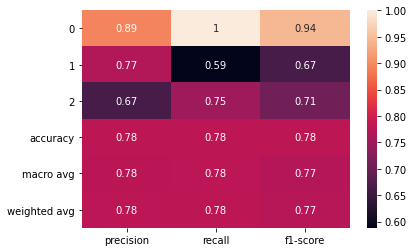

In [61]:
#.iloc[:-1,:] to exclude support 
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1,:].T,annot=True)

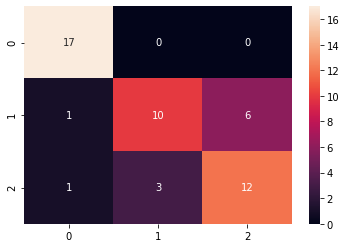

In [65]:
mat1 = confusion_matrix(y_test,y_pred)
sns.heatmap(mat1,annot=True,fmt='d')

## Conclusion

**Here we build a ANN model with 100 epochs and visualize train vs test loss, train and test accuracy,classification report and confusion metrics .So we can see that the model achieved an estimated classification accuracy of about 78%.**

## Thank You !!
**Manish Mohan Kamble**